In [1]:
#Import all the required libraries :
import pandas as pd  #pandas library importing
import numpy as np  #Numpy library importing
import matplotlib.pyplot as plt #Importing library for basic plotting i.e. visualization
import seaborn as sb #Importing seaborn library for advanced plotting 
from sklearn.model_selection import train_test_split #import train test library
from sklearn.linear_model import LinearRegression #importing linear regression library
from sklearn import metrics #importing libraries for matrices for regression model
from sklearn.preprocessing import MinMaxScaler #data normalizing library
from sklearn.linear_model import Lasso, Ridge #Importing Lasso and Ridge library
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error,accuracy_score #import library for mean squared,r2 score & mean_absolut error metrices 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Importing libraries for GridSearch and Random search implementation
from scipy.stats import uniform #Import uniform function from stats library
%matplotlib inline 
#To make inline background plotting with the front

In [2]:
ds=pd.read_csv(r'C:\Users\wonde\Desktop\Hamoye\Stage B\energydata_complete.csv')

In [3]:
ds.shape #checking dataset shape i.e. rows and columns

(19735, 29)

In [4]:
ds.describe() #dataset descriptions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
ds1=ds.drop(columns=['date','lights']) #removing 'date' and 'lights' and creating a dataset 

In [6]:
print("Columns are:",ds1.columns) #Check what columns are there in created dataset
print("Dataset Shape is:",ds1.shape)

Columns are: Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')
Dataset Shape is: (19735, 27)


In [7]:
mmscaler = MinMaxScaler() #instantiate the minMaxScaler 

In [8]:
#normalised_dst = pd.DataFrame(mmscaler.fit_transform(ds), columns=ds.columns) 
#Normalizing data using MinMaxScaler
normalised_ds = pd.DataFrame(mmscaler.fit_transform(ds1), columns=ds1.columns)
features_ds = normalised_ds.drop(columns=['Appliances'])
Appliencies_target = normalised_ds['Appliances']

In [9]:
features_ds1 = normalised_ds.drop(columns=['T2'])
Appliencies_target1 = normalised_ds['T6']

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(features_ds1, Appliencies_target1, test_size=0.7, random_state=42)

In [11]:
regressor1 = LinearRegression() #instantiate linearRegression
regressor1.fit(X_train1, y_train1) #fit train data to regression model

LinearRegression()

In [14]:
y_pred1 = regressor1.predict(X_test1) #predicting values of indpendant variable using test data

In [15]:
#Let us apply regression model metrices to understand the quality of our model
print('Mean Absolute Error:', mean_absolute_error(y_test1, y_pred11))
print('Mean Squared Error:', mean_squared_error(y_test1, y_pred11))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test1, y_pred11)))

Mean Absolute Error: 3.704534564336554e-16
Mean Squared Error: 2.156448925630828e-31
Root Mean Squared Error: 4.643758096230711e-16


In [ ]:
regressor1.score(X, y)

In [55]:
regressor1.coef_

array([ 0.00481712,  0.55809968, -0.24112476, -0.42248405,  0.29246339,
        0.09858354,  0.02940807, -0.02072705, -0.02382616,  0.0237228 ,
        0.23649015,  0.04483775, -0.00898112, -0.02315665,  0.11338828,
       -0.17340387, -0.18132678, -0.02846517, -0.24345125,  0.01367241,
       -0.0438728 ,  0.03507188,  0.01623859,  0.06864232, -0.0007297 ,
       -0.0007297 ])

In [23]:
#instantiating x with morethan one columns and y predictable dependand variable
#X = normalised_dst[['T1', 'RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out','Press_mm_hg','RH_out','Windspeed','Visibility', 'Tdewpoint','rv1','rv2']].values
#y = normalised_dst['Appliances'].values

In [24]:
#using 70-30 train-set split with random state 42 as suggested
X_train, X_test, y_train, y_test = train_test_split(features_ds, Appliencies_target, test_size=0.7, random_state=42)

In [25]:
regressor = LinearRegression() #instantiate linearRegression
regressor.fit(X_train, y_train) #fit train data to regression model

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test) #predicting values of indpendant variable using test data

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #fit actual value with Predicted for easy visualization
df1 = df.head(25) #select top 25 records 
print("Show case - ACTUAL value with PREDICTED value:\n",df1) #printing pandas dataframe

Show case - ACTUAL value with PREDICTED value:
          Actual  Predicted
8980   0.028037   0.039644
2754   0.074766   0.252423
9132   0.037383   0.035706
14359  0.037383   0.101779
8875   0.056075   0.032250
10239  0.102804   0.170581
8348   0.102804   0.072864
15847  0.056075   0.162525
13166  0.037383   0.075880
7801   0.056075   0.098561
451    0.093458   0.137205
12350  0.056075   0.095020
4614   0.084112   0.143011
7221   0.093458   0.083102
11384  0.102804   0.109895
9564   0.037383   0.043416
13607  0.037383   0.055413
15465  0.037383   0.043985
16337  0.018692   0.042523
4339   0.121495   0.113492
7888   0.046729   0.068597
10074  0.046729   0.070946
1632   0.009346   0.065793
2300   0.028037   0.061798
18124  0.308411   0.163748


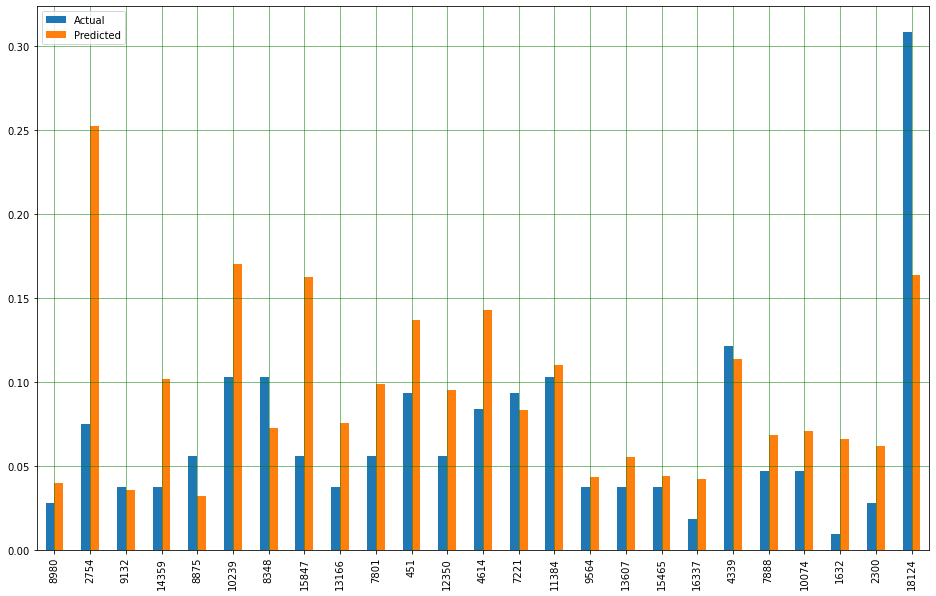

In [28]:
#Below graph shows the ACTUAL value with PREDICTE value for selected 25 rows
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
#Let us apply regression model metrices to understand the quality of our model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.05004159363826472
Mean Squared Error: 0.008034593423770097
Root Mean Squared Error: 0.08963589361282731


In [31]:
#Conclusion 
#The mean value of Appliances is 97.695, 
#The root mean squared value of prediction algorithm reads 0.0896.
#This indicates that the prediction model is accurate enough.

In [32]:
#Effects of Regularizing regression model
lasso_reg = Lasso(alpha=0.001) #Lasso
lasso_reg.fit(X_train, y_train)

#Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [33]:
#comparing the effects of regularisation
def get_weights_df1(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [34]:
linear_model_weights = get_weights_df1(regressor, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df1(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df1(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [35]:
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0          RH_2            -0.422484     -0.310922     -0.000000
1         T_out            -0.243451     -0.147050      0.000000
2            T2            -0.241125     -0.156279      0.000000
3            T9            -0.181327     -0.178370     -0.000000
4          RH_8            -0.173404     -0.169222     -0.001878
5        RH_out            -0.043873     -0.011362     -0.041568
6          RH_9            -0.028465     -0.032828     -0.000000
7            T5            -0.023826     -0.032545     -0.000000
8          RH_7            -0.023157     -0.029293     -0.000000
9          RH_4            -0.020727     -0.022079      0.000000
10           T7            -0.008981     -0.007537     -0.000000
11          rv1            -0.000730     -0.000915     -0.000000
12          rv2            -0.000730     -0.000915     -0.000000
13           T1             0.004817     -0.031307      0.000000
14  Press_mm_hg          

In [43]:
param_grid = {'alpha':uniform()}

In [45]:
model = Ridge()
grid = RandomizedSearchCV(model,param_distributions=param_grid)
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=Ridge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019DB00A0F08>})

In [46]:
print("best score:",grid.best_score_)
print("best alpha:",grid.best_estimator_.alpha)

best score: 0.13475929745489018
best alpha: 0.12442735528459103


In [ ]:
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

In [17]:
#normalised_dst = pd.DataFrame(mmscaler.fit_transform(ds), columns=ds.columns)
features_ds1 = normalised_ds['T2']
Appliencies_target1 = normalised_ds['T6']

In [18]:
X = normalised_ds['T2'].values.reshape(-1,1)
y = normalised_ds['T6'].values.reshape(-1,1)

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.7, random_state=42)

In [20]:
regressor1 = LinearRegression() #instantiate linearRegression
regressor1.fit(X_train1, y_train1) #fit train data to regression model

LinearRegression()

In [22]:
y_pred1 = regressor1.predict(X_test1) #predicting values of indpendant variable using test data

In [23]:
#Let us apply regression model metrices to understand the quality of our model
print('Mean Absolute Error:', mean_absolute_error(y_test1, y_pred1))
print('Mean Squared Error:', mean_squared_error(y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 0.08284806594175197
Mean Squared Error: 0.011342034129917232
Root Mean Squared Error: 0.10649898652061077


In [25]:
regressor1.coef_

array([[0.89751484]])

In [27]:
regressor1.intercept_

array([0.13155158])

In [29]:
res=((regressor1.predict(X_test1) - y_test1) ** 2).sum()
print("Residual Sum error is",res)

Residual Sum error is 156.69020150480657
